In [1]:
import pandas as pd

# Loading the plate dataset
plate_df=pd.read_csv('../data/vanity_plate_data.csv')

#### Exploratory data analysis (EDA)

In this section we perform EDA of the given dataset to use it to answer the research question. 

In [6]:
plate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133636 entries, 0 to 133635
Data columns (total 4 columns):
Unnamed: 0    133636 non-null int64
date          133636 non-null object
plate         133635 non-null object
outcome       133636 non-null object
dtypes: int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
plate_df.head()

,Unnamed: 0,date,plate,outcome
0,0,2010-10-01,ANDARE,accepted
1,1,2010-10-01,1TWIN,accepted
2,2,2010-10-01,11VROD,accepted
3,3,2010-10-01,4SKNMC,accepted
4,4,2010-10-01,7IRON6,accepted


The dataset has four columns. For this project the important ones are `plate` and `outcome`. Only one value in `plate` is null or missing, which we need to eliminate in the wrangling step. Both `plate` and `outcome` are non-numeric data types. `plate` is string while `outcome` is boolean having two values `accepted` and `rejected`.

Since, the project is focused on making the predictions on the `outcome` based on `plate`, it is essential to know if we have same number of examples in the `outcome` for classification. The below plot shows the simple bar chart of the two `outcome` values. 

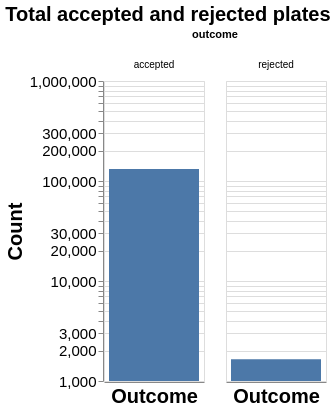

In [46]:
import altair as alt
alt.data_transformers.enable('json')

alt.Chart(plate_df).mark_bar().encode(
    alt.X("outcome:N", bin=True, axis=alt.Axis(ticks = False, labels = False),title = 'Outcome'),
    alt.Y("count()", scale=alt.Scale(type='log', base=10), title = 'Count'), 
    column = 'outcome:N'
).configure_axis(labelFontSize=15,titleFontSize=20
).configure_title(fontSize=20
).properties(title="Total accepted and rejected plates", width=100, height=300)

In [60]:
print('Total number of accepted plate is',plate_df.query('outcome == "accepted"').shape[0])
print('Total number of rejected plate is',plate_df.query('outcome == "rejected"').shape[0])

Total number of accepted plate is 131990
Total number of rejected plate is 1646


This means that we have significant class imbalance in our data. Thus, we need to account for this in our model

The top 10 most common accepted plate configurations are below

In [55]:
plate_df.query('outcome == "accepted"')['plate'].value_counts().head(10) 

MASON       7
LB          5
MHA         5
TOMK        5
7A74        4
INFINITI    4
MVVG        4
KLS411      4
DWB7        4
PWP         4
Name: plate, dtype: int64